# K-Means

In [14]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from wrangle import iris_df, get_distances, prep_mall
from explore import scatter_plot
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# To ignore FutureWarning specifically:
warnings.filterwarnings("ignore", category=FutureWarning)

## 1

### Clustering with the Iris Dataset

### Using this lesson as a guide, perform clustering on the iris dataset.

#### a) Choose features other than the ones used in the lesson.

In [15]:
# Load the Iris dataset
# Clean up the column names
# Split the DataFrame into train, val, and test sets
train, val, test = iris_df()

In [16]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
82,5.5,2.4,3.7,1.0,versicolor
134,6.3,2.8,5.1,1.5,virginica
138,6.4,3.1,5.5,1.8,virginica
76,6.6,3.0,4.4,1.4,versicolor
110,7.2,3.6,6.1,2.5,virginica


In [17]:
def get_distances(list_a, list_b):
    # initialize an empty list to toss the
    # differences into
    difs = []
    # for every comparison of dims in the points:
    for a_i, b_i in zip(list_a, list_b):
        difs.append((a_i - b_i) ** 2)
    return sum(difs) ** .5

In [18]:
point_a = [0, 1, 3]
point_b = [6, 10, 30]
get_distances(point_a, point_b)

29.086079144497972

In [19]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [20]:
scaler = MinMaxScaler()
train[['sepal_width', 'petal_width']] = \
scaler.fit_transform(train[['sepal_width', 'petal_width']])

In [21]:
feats = ['sepal_width', 'petal_width']

In [22]:
# lets create some centroids:
centroid = {
    0: [0,0],
    1: [0.5, 0.5],
    2: [0.8,0.8]
}

In [23]:
def assign_clusters():
    # initialize a place to toss cluster assignments
    cluster_assignments = []
    #iterate through every row in the dataframe:
    for i, row in train[feats].iterrows():
        # print('========')
        # toss our centroid distances somewhere:
        distances = []
        # iterate through every centroid
        for n in centroid.keys():
            # use our distance function to calc the 
            #distance between each data point and the centroids
            distances.append(get_distances(centroid[n], row.values))
        # use the distances list,
        # cast it as a series, use index of the min to link
        # back to the dictionay keys
        cluster = pd.Series(distances).idxmin()
        cluster_assignments.append(cluster)
        # print('--------')
    return cluster_assignments

In [24]:
train['cluster'] = assign_clusters()

In [25]:
# update the centroids:
# iterate through the groups:
for i in train.cluster.unique():
    centroid[i] = train[
        ['sepal_width', 'petal_width', 'cluster']
    ].groupby('cluster').mean().values[i]

In [26]:
feats_with_cluster = ['sepal_width', 'petal_width', 'cluster']

In [27]:
# Performing clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(train[feats])

#### b) Visualize the results of your clustering.

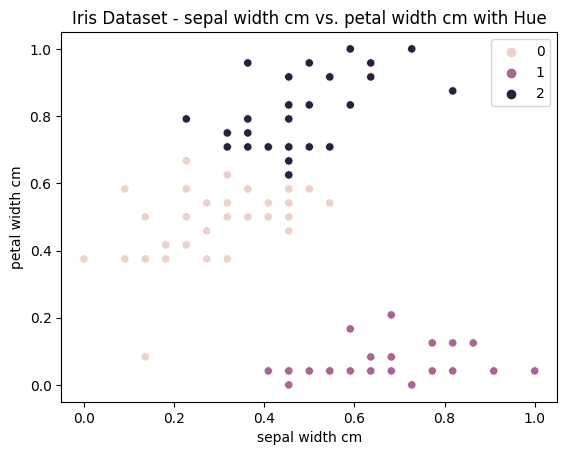

In [28]:
# Create a scatter plot using the custom scatter_plot function to visualize the relationship between
# 'petal_length' and 'petal_width' in the 'train' DataFrame, with data points color-coded by 'species'.
scatter_plot(train, 'sepal_width', 'petal_width', clusters, 'sns')

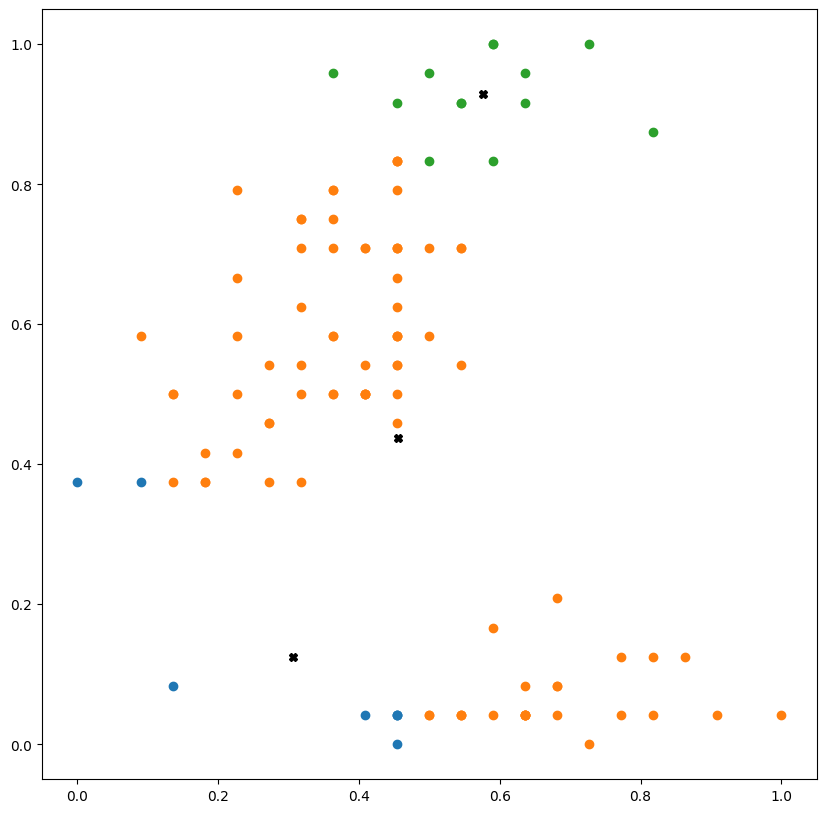

In [29]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
for cluster, subset in train[feats_with_cluster].groupby(
    'cluster'):
    ax.scatter(subset['sepal_width'], subset['petal_width'], label=cluster)
for i in centroid.keys():
    # unpack the dimensions associated with the data point in the dictionary
    ax.plot(*centroid[i], marker='X', c='black')
plt.show()

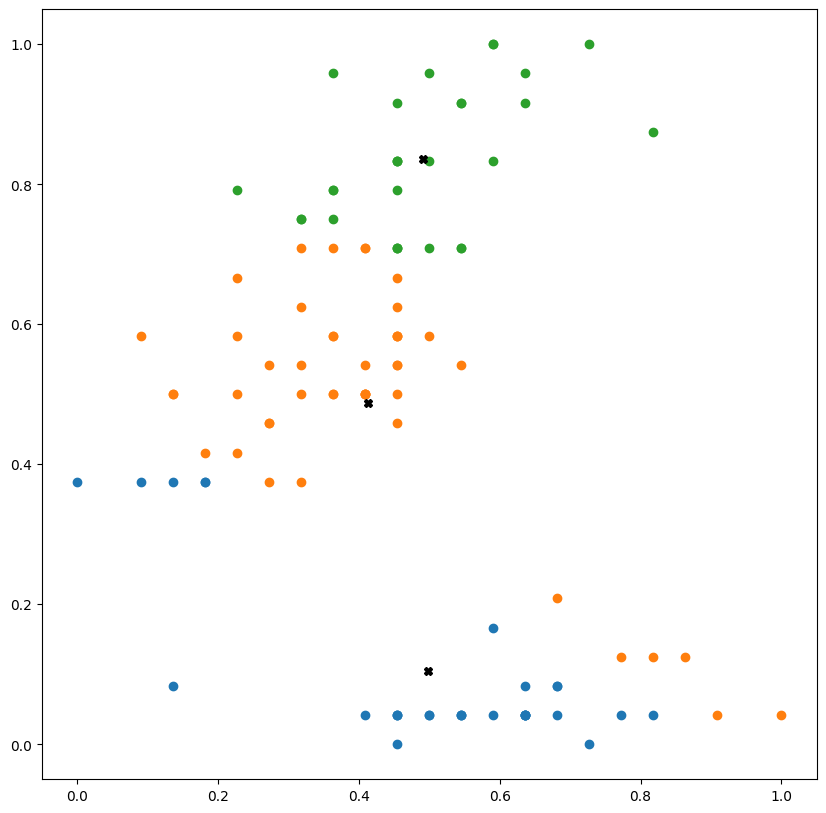

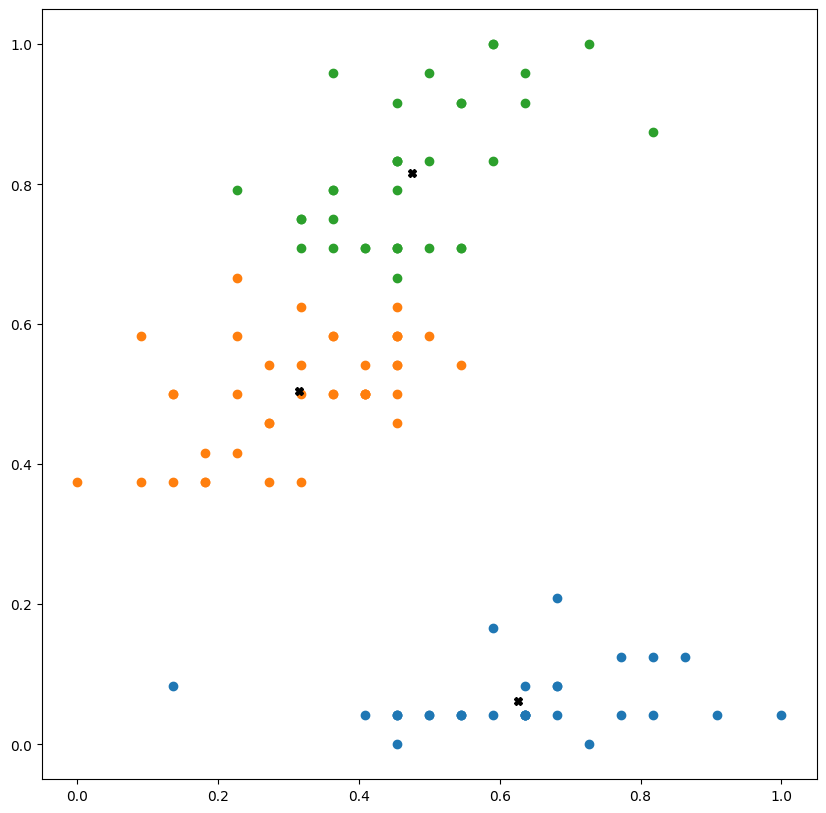

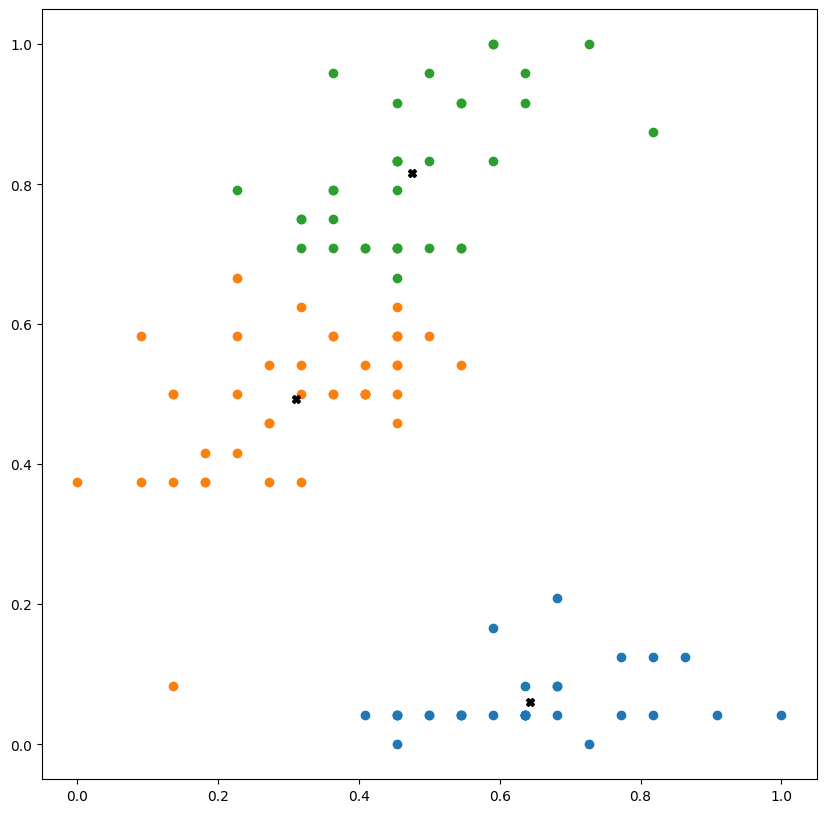

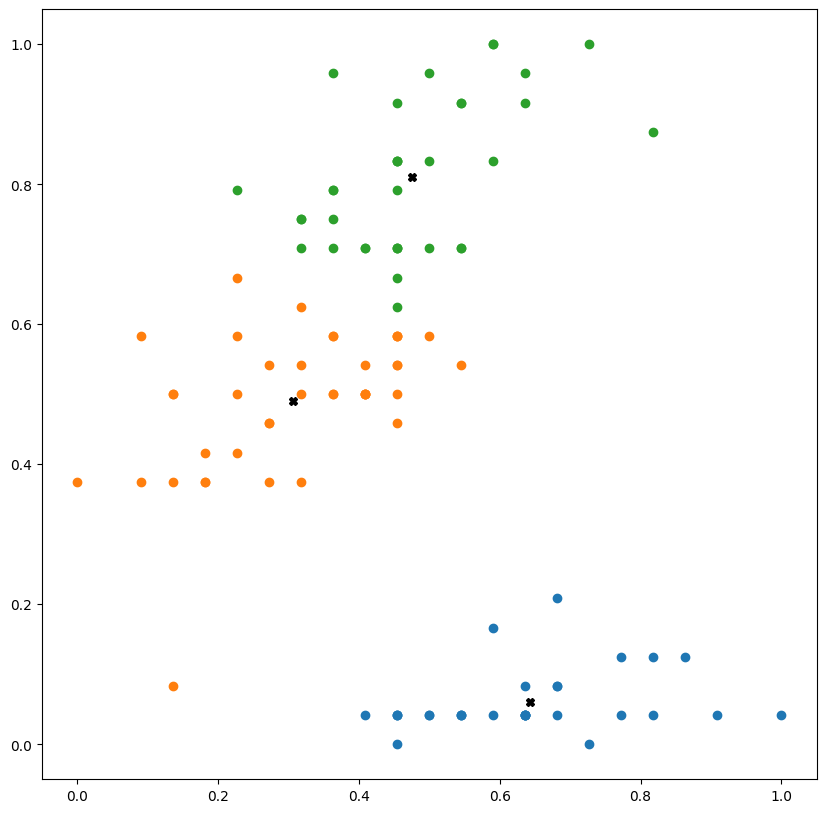

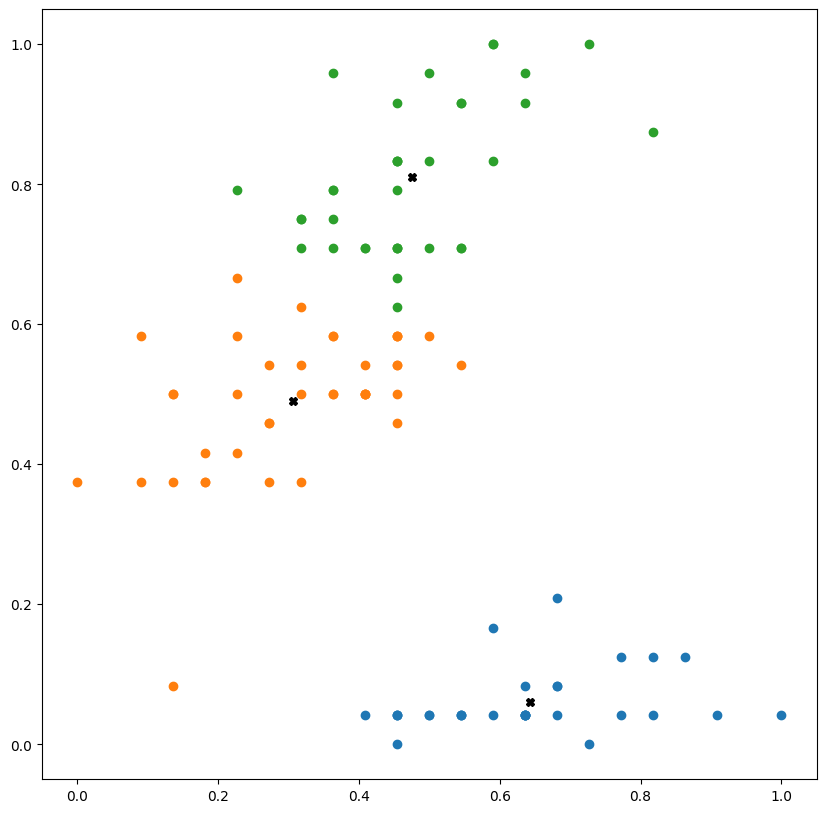

In [30]:
for i in range(5):
    # assign the clusters
    train['cluster'] = assign_clusters()
    # update the centroids
    for i in train.cluster.unique():
        centroid[i] = train[
            ['sepal_width', 'petal_width', 'cluster']
        ].groupby('cluster').mean().values[i]
    # plot the stuff:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    for cluster, subset in train[feats_with_cluster].groupby(
        'cluster'):
        ax.scatter(subset['sepal_width'], subset['petal_width'], label=cluster)
    for i in centroid.keys():
        # unpack the dimensions associated with the data point in the dictionary
        ax.plot(*centroid[i], marker='X', c='black')
    plt.show()

#### c) Use the elbow method to visually select a good value for k.  

In [31]:
# Use the Elbow Method to select a good value for k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(train[feats])
    wcss.append(kmeans.inertia_)

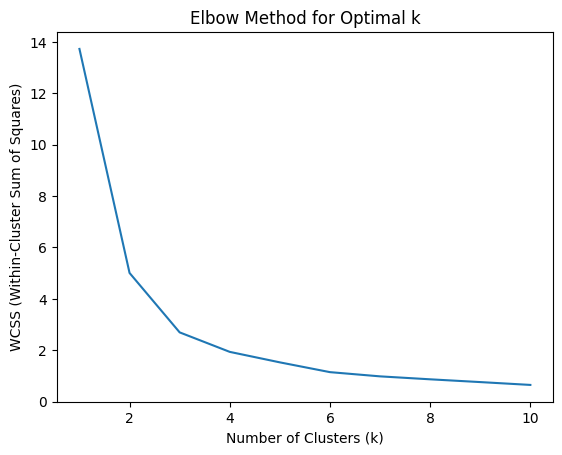

In [32]:
# Plotting the elbow method graph
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

#### d) Repeat the clustering, this time with 3 different features.

In [33]:
# Select the features for clustering
X = train[['sepal_length', 'petal_length']]

In [34]:
# Standardize the data to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
feats = ['sepal_length', 'petal_length']

# lets create some centroids:
centroid = {
    0: [0,0],
    1: [0.5, 0.5],
    2: [0.8,0.8]
}

def assign_clusters():
    # Initialize a list to store cluster assignments
    cluster_assignments = []

    # Iterate through every row in the DataFrame
    for i, row in train[['sepal_length', 'petal_length']].iterrows():
        # Toss our centroid distances somewhere
        distances = []

        # Iterate through every centroid
        for n in centroid.keys():
            # Use our distance function to calculate the distance
            distance = get_distances(centroid[n], row.values)
            distances.append(distance)

        # Check if distances list is empty (all centroids are empty)
        if not distances:
            # Handle the case when there are no centroids (e.g., in the first iteration)
            # Assign the data point to the nearest centroid (cluster 0 by default)
            cluster = 0
        else:
            # Use the distances list to find the nearest cluster
            cluster = pd.Series(distances).idxmin()

        # Append the cluster assignment
        cluster_assignments.append(cluster)

    return cluster_assignments

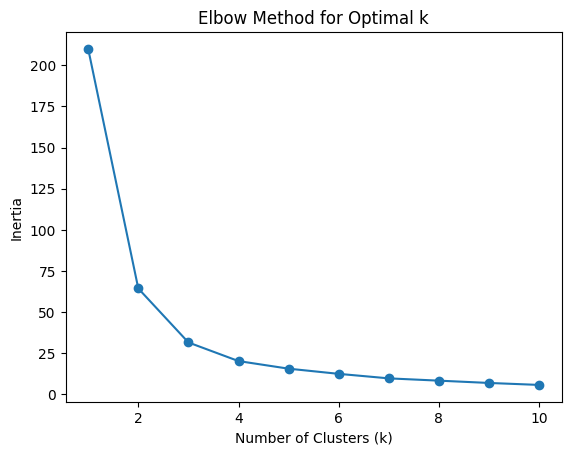

In [36]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [37]:
# Fit K-Means with the chosen value of k
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

# Get cluster assignments
cluster_assignments = kmeans.labels_

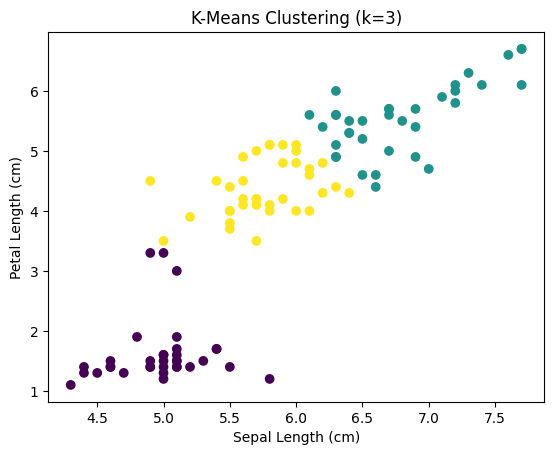

In [38]:
# Visualize the clusters
plt.scatter(X['sepal_length'], X['petal_length'], c=cluster_assignments, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('K-Means Clustering (k=3)')
plt.show()

In [39]:
feats_with_cluster = ['sepal_length', 'petal_length', 'cluster']

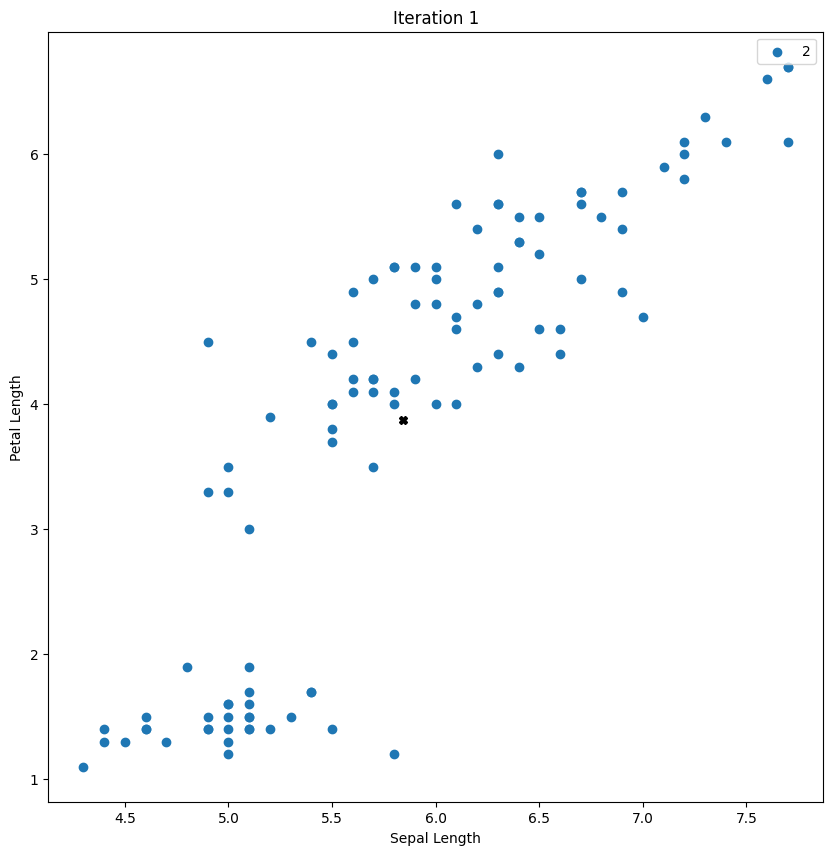

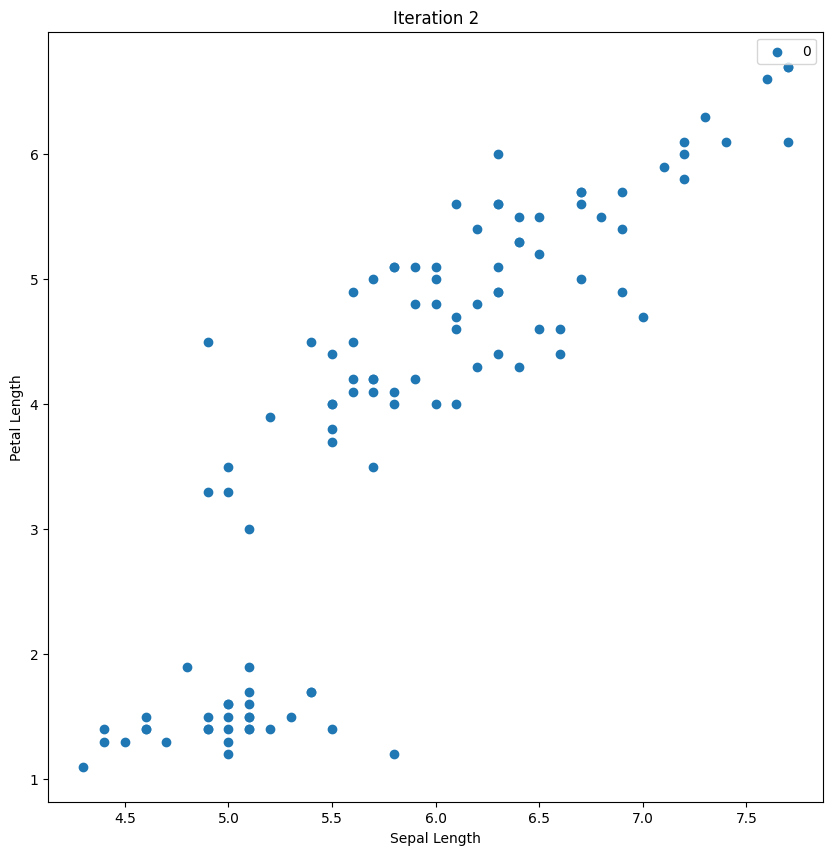

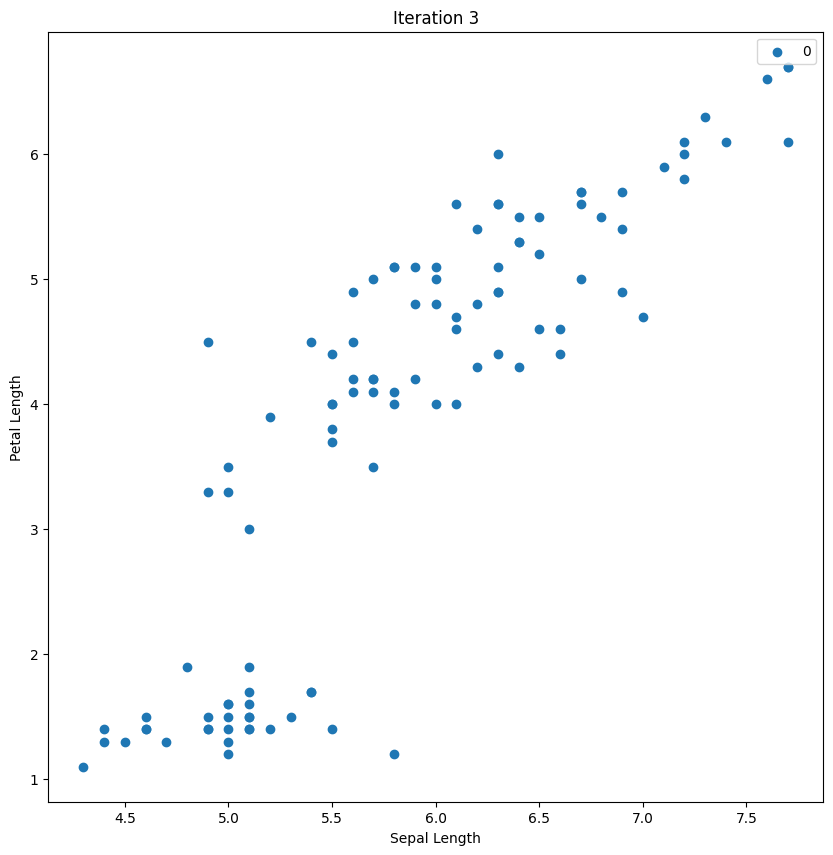

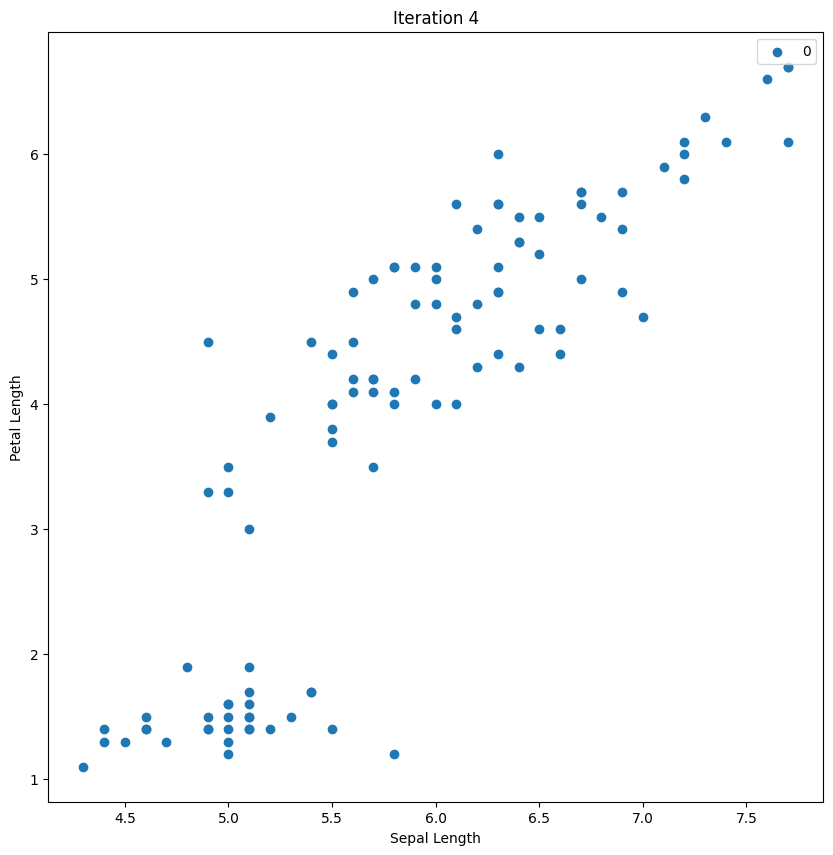

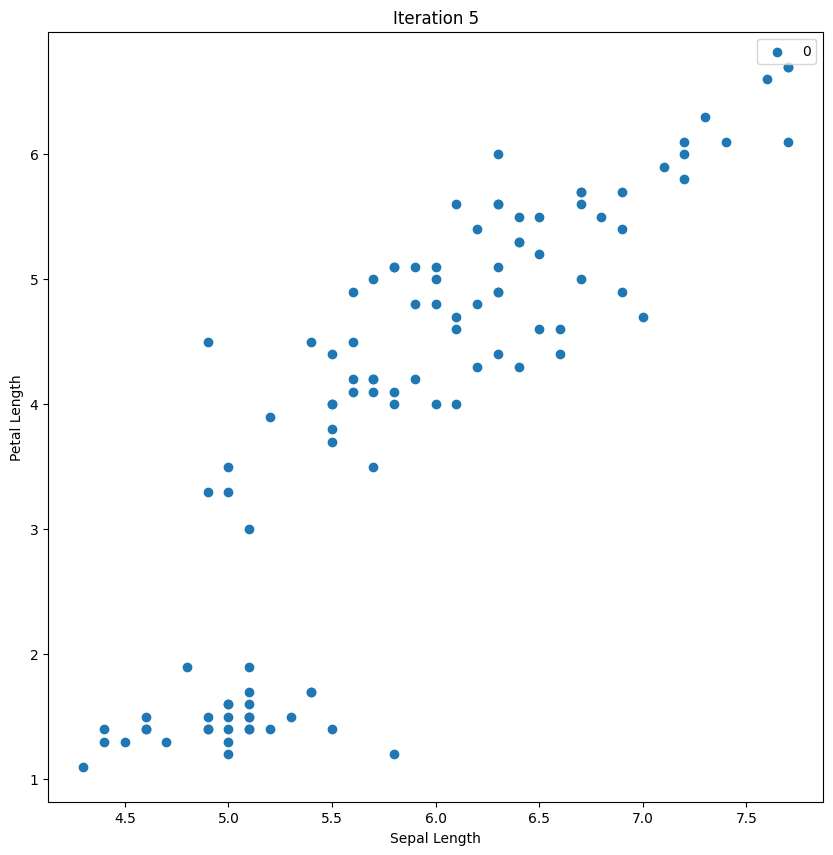

In [45]:
# Number of iterations
num_iterations = 5

# Visualize clusters and centroids in each iteration
for iteration in range(num_iterations):
    # Assign clusters
    train['cluster'] = assign_clusters()

    # Update centroids based on the newly assigned clusters
    new_centroids = {}
    for cluster_id in centroid.keys():
        # Compute the new centroid for each cluster
        cluster_data = train[train['cluster'] == cluster_id][['sepal_length', 'petal_length']]
        if not cluster_data.empty:
            new_centroid = cluster_data.mean().values
            new_centroids[cluster_id] = new_centroid

    # Update centroids dictionary with the new centroids
    centroid = new_centroids

    # Visualization (move this part to a separate function if needed)
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    for cluster_id, subset in train[['sepal_length', 'petal_length', 'cluster']].groupby('cluster'):
        ax.scatter(subset['sepal_length'], subset['petal_length'], label=cluster_id)
    
    for cluster_id, coords in centroid.items():
        # Unpack the dimensions associated with the data point in the dictionary
        ax.plot(*coords, marker='X', c='black')

    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.title(f'Iteration {iteration + 1}')
    plt.legend()
    plt.show()


# 2)
Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [46]:
train, val, test = prep_mall()

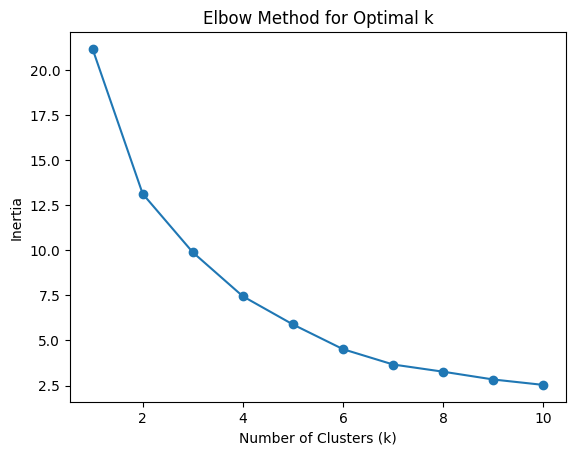

In [47]:
# Select features for clustering
X = train[['age_scaled', 'annual_income_scaled', 'spending_score_scaled']]

# Determine the optimal number of clusters (k) using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [48]:
# Choose the optimal value of k based on the Elbow Method (e.g., k=5)
optimal_k = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_assignments = kmeans.fit_predict(X)

# Add cluster assignments to the DataFrame
train['cluster'] = cluster_assignments


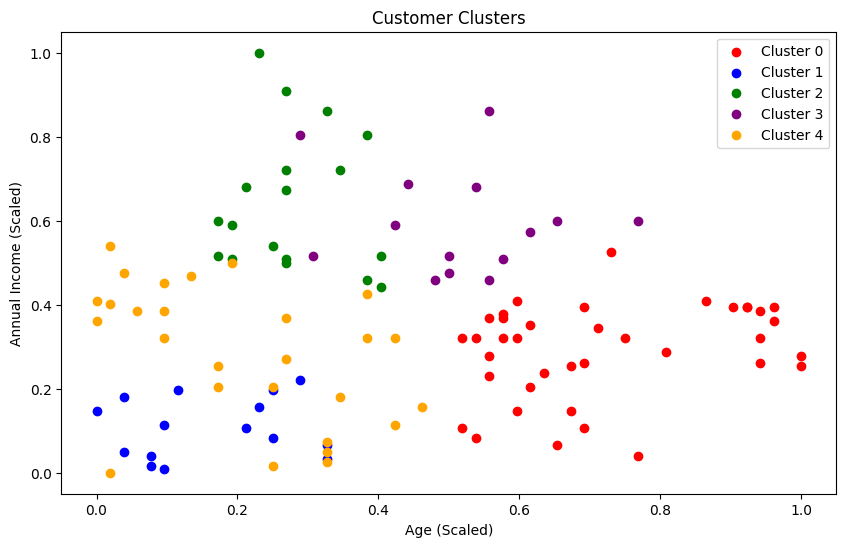

In [49]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_id, color in enumerate(['red', 'blue', 'green', 'purple', 'orange']):
    cluster_data = train[train['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['age_scaled'],
        cluster_data['annual_income_scaled'],
        c=color,
        label=f'Cluster {cluster_id}'
    )

plt.xlabel('Age (Scaled)')
plt.ylabel('Annual Income (Scaled)')
plt.title('Customer Clusters')
plt.legend()
plt.show()


In [50]:
feats = ['age_scaled', 'annual_income_scaled', 'spending_score_scaled']
# lets create some centroids:
centroid = {
    0: [0,0],
    1: [0.5, 0.5],
    2: [0.8,0.8]
}

def assign_clusters():
    # Initialize a list to store cluster assignments
    cluster_assignments = []

    # Iterate through every row in the DataFrame
    for i, row in X.iterrows():
        # Toss our centroid distances somewhere
        distances = []

        # Iterate through every centroid
        for n in centroid.keys():
            # Use our distance function to calculate the distance
            distance = get_distances(centroid[n], row.values)
            distances.append(distance)

        # Check if distances list is empty (all centroids are empty)
        if not distances:
            # Handle the case when there are no centroids (e.g., in the first iteration)
            # Assign the data point to the nearest centroid (cluster 0 by default)
            cluster = 0
        else:
            # Use the distances list to find the nearest cluster
            cluster = pd.Series(distances).idxmin()

        # Append the cluster assignment
        cluster_assignments.append(cluster)

    return cluster_assignments

In [53]:
# Number of iterations
num_iterations = 5

# Visualize clusters and centroids in each iteration
for iteration in range(num_iterations):
    # Assign clusters
    train['cluster'] = assign_clusters()

    # Update centroids based on the newly assigned clusters
    new_centroids = {}
    for cluster_id in centroid.keys():
        # Compute the new centroid for each cluster
        cluster_data = train[train['cluster'] == cluster_id][['age_scaled', 'annual_income_scaled', 'spending_score_scaled']]
        if not cluster_data.empty:
            new_centroid = cluster_data.mean().values
            new_centroids[cluster_id] = new_centroid

    # Update centroids dictionary with the new centroids
    centroid = new_centroids

    # Visualization (move this part to a separate function if needed)
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    for cluster_id, subset in train[['age_scaled', 'annual_income_scaled', 'spending_score_scaled', 'cluster']].groupby('cluster'):
        ax.scatter(subset['age_scaled'], subset['annual_income_scaled'],subset['spending_score_scaled'], label=cluster_id)
    
    for cluster_id, coords in centroid.items():
        # Unpack the dimensions associated with the data point in the dictionary
        ax.plot(*coords, marker='X', c='black')

    plt.xlabel('age_scaled')
    plt.ylabel('annual_income_scaled')
    plt.title(f'Iteration {iteration + 1}')
    plt.legend()
    plt.show()

KeyError: "None of [Index(['sepal_length', 'petal_length'], dtype='object')] are in the [columns]"